In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Session 02
## Supervised Learning
### Classification pt1

<img src='../../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

## Import Statements

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [4]:
# at times, it makes sense to ignore irrelevant warnings
import warnings

warnings.filterwarnings('ignore')

In [5]:
# Some Basic Directories for housekeeping
# set location of input files:
inpDir = os.path.join('..','..', '..', 'input')

outDir = os.path.join('..', 'output')

moduleDir ='machine_learning'
# define and set random state 
RANDOM_STATE = 24

np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

CMAP = plt.cm.rainbow

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'image.cmap' : CMAP,
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }


plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

## Helper Function

In [12]:
def fn_plot_decision_boundary(pred_func, X, y, ax =None):
    '''
    Args:
        pred_func: trained (I hope) to make predictions
        X : features
        y : targets or labels
        ax : matplotlib axes object
    '''
    if ax is None:
        ax = plt.gca()

    xMin, xMax = X[:, 0].min() - 0.05, X[:, 0].max() + 0.05 
    yMin, yMax = X[:, 1].min() - 0.05, X[:, 1].max() + 0.05

    # grid spacing
    h = 0.05

    xx,yy = np.meshgrid(np.arange(xMin, xMax, h), 
                        np.arange(yMin, yMax, h))
    
    Z = pred_func.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    ax.contourf(xx,yy,Z, cmap = CMAP, alpha = 0.6)

    ax.scatter(X[:,0], X[:, 1], c = y, cmap = CMAP, edgecolor = 'k') 

Classification

INitialize -> Fit -> Predict

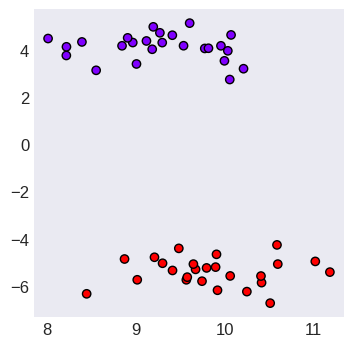

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  cluster_std=0.6,
                  random_state=RANDOM_STATE)
fig, ax = plt.subplots(figsize = (4,4))
ax.scatter(X[:,0], X[:, 1], c = y, cmap = CMAP, edgecolor = 'k')
ax.grid()

In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # instantiate
clf.fit(X, y)
y_pred = clf.predict(X)
y_pred.shape

(50,)

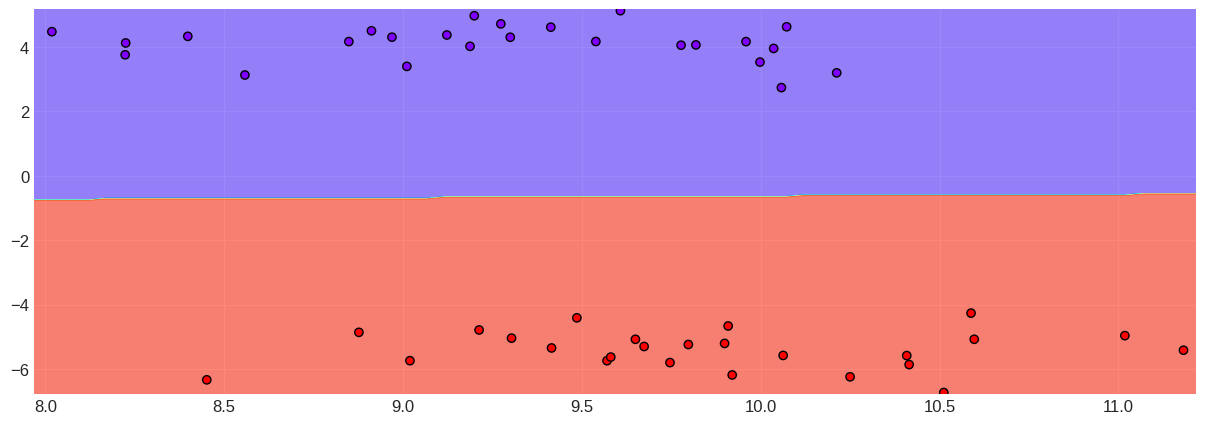

In [21]:
fn_plot_decision_boundary(clf, X, y)

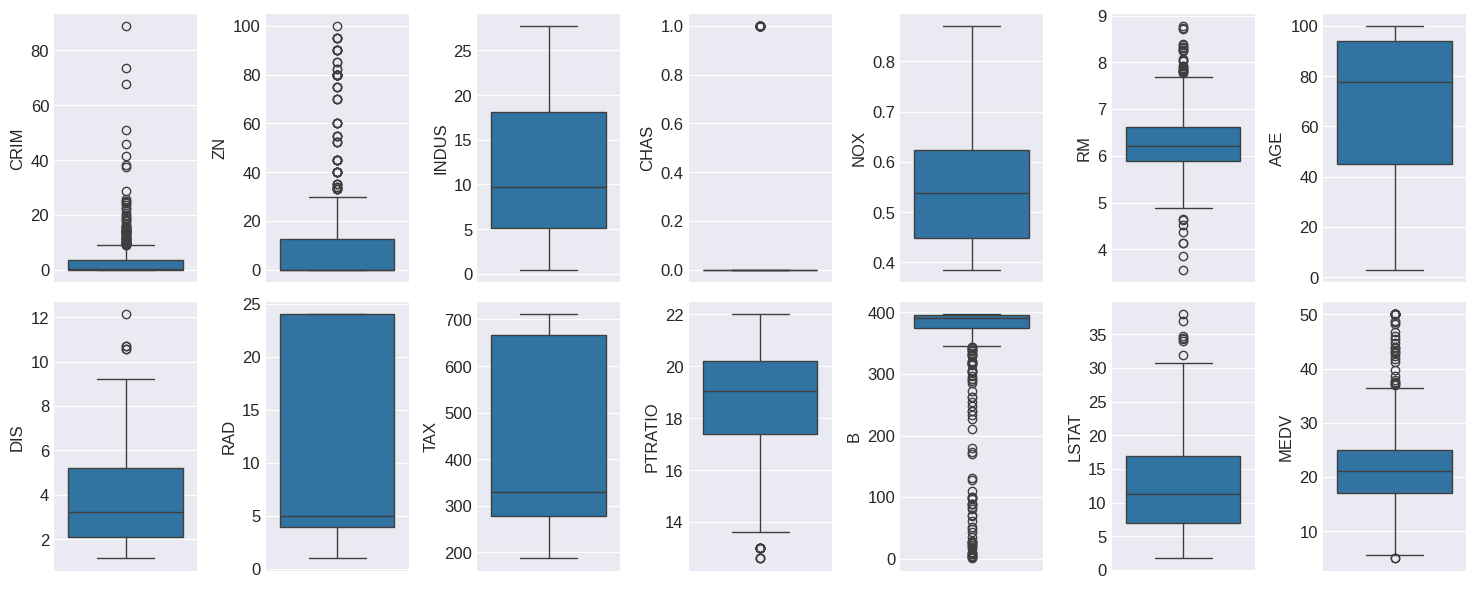

In [9]:
fig, axes = plt.subplots(2,7, figsize = (15, 6))

axes = axes.ravel()

for count, col in enumerate(data_df.columns):
    ax = axes[count]
    sns.boxplot(data=data_df, y = col, ax = ax)
plt.tight_layout()

In [10]:
# Documentation says that House prices were limited to 50
data_df = data_df[data_df['MEDV'] < 50].copy()
data_df.reset_index(inplace=True, drop= True)
data_df.shape

(490, 14)

<Axes: >

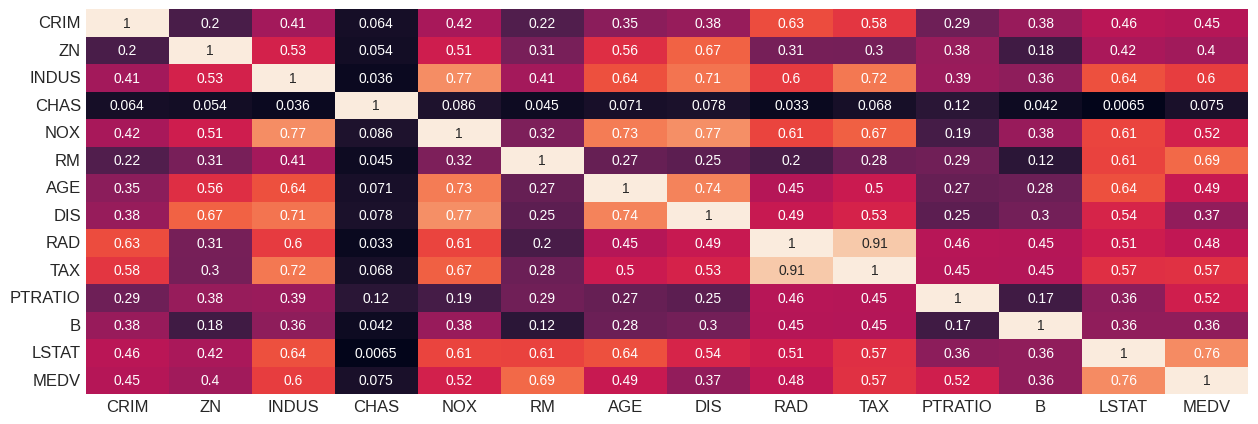

In [11]:
sns.heatmap(data_df.corr().abs(), 
            annot = True, 
            cbar = False)

# Feature Engineering

In [ ]:
colums_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX']

scaler = MinMaxScaler()

features_df = data_df[colums_sels].copy()
target = data_df['MEDV']

features_df.max(), features_df.min()


In [15]:
X = scaler.fit_transform(features_df)
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

In [16]:
reg = LinearRegression() # instantiate
reg.fit(X, target)
y_pred = reg.predict(X)
y_pred.shape

(490,)

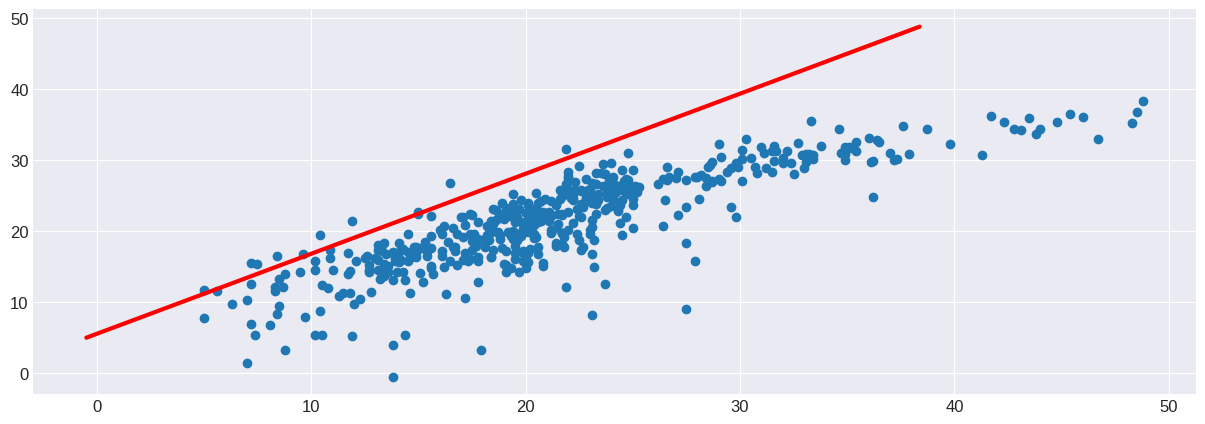

In [18]:
plt.scatter(target, y_pred)
plt.plot([y_pred.min(), y_pred.max()], 
         [target.min(), target.max()], c = 'r', lw=3)